In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
import pickle




In [ ]:
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving PS_20174392719_1491204439457_log.csv.zip to PS_20174392719_1491204439457_log.csv (3).zip


In [ ]:
# Reading the csv data
df = pd.read_csv('PS_20174392719_1491204439457_log.csv.zip')


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.drop(['isFlaggedFraud'], axis = 1, inplace = True)


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [ ]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')


In [ ]:
df.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

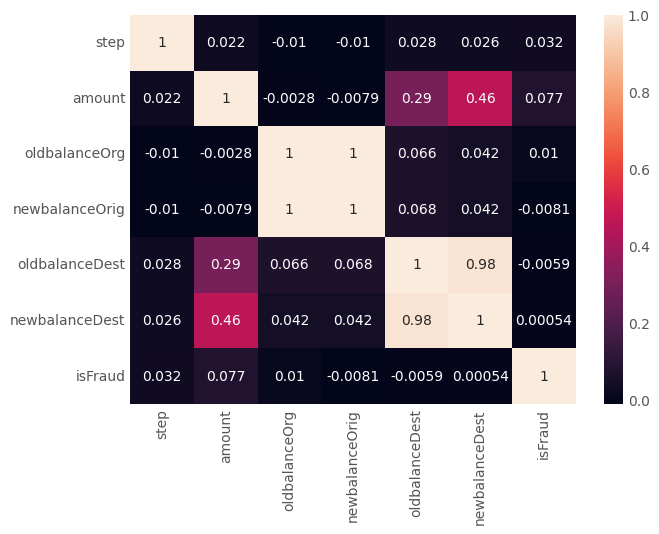

In [ ]:
#heatmap
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='step', ylabel='Count'>

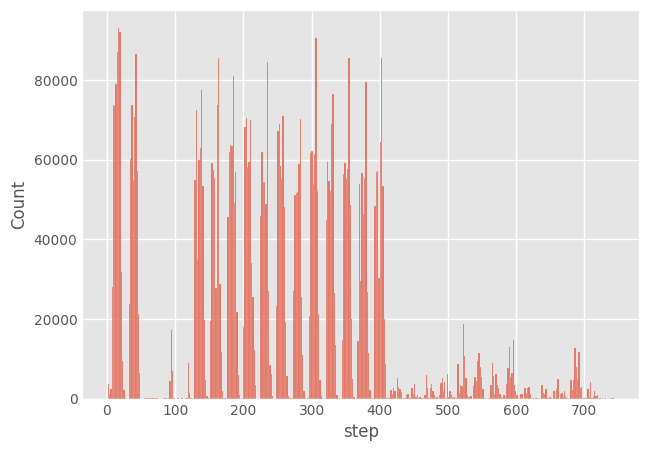

In [ ]:
#step
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

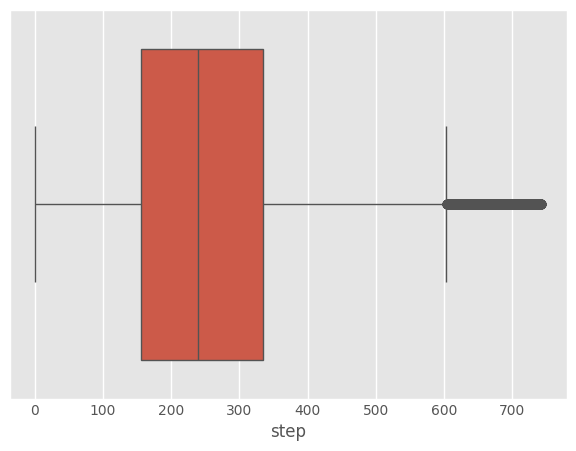

In [ ]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

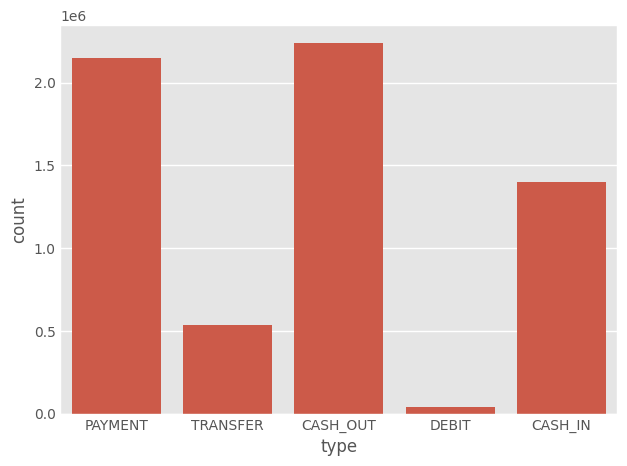

In [ ]:
#type
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

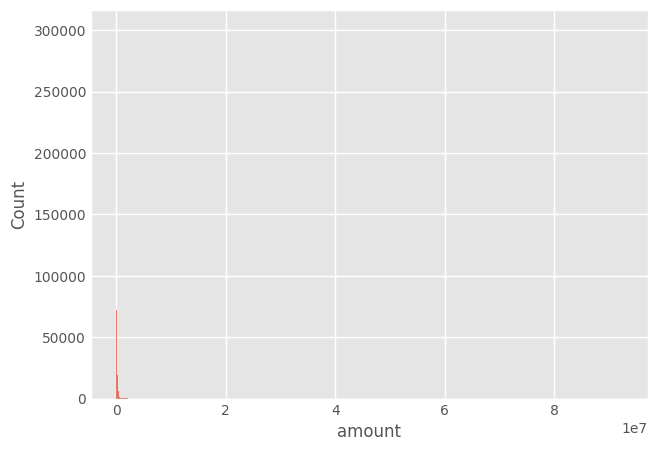

In [ ]:
#amount
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

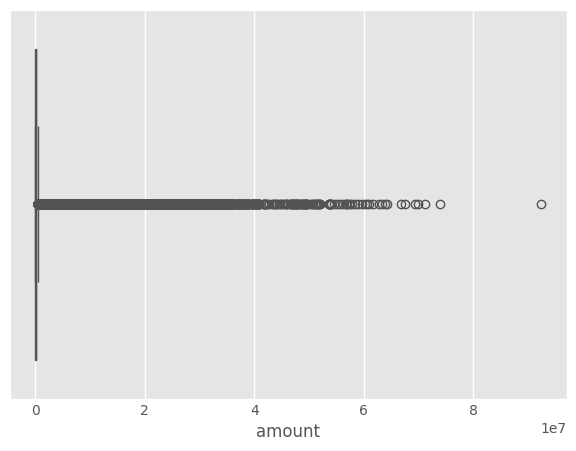

In [ ]:
#amount
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

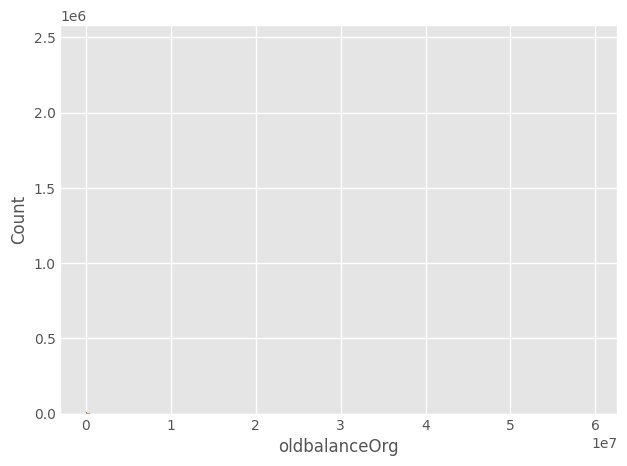

In [ ]:
#oldbalanceOrg
sns.histplot(data=df,x='oldbalanceOrg')

In [ ]:
#nameDest
df['nameDest'].value_counts()

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M367627425,1
M1902904124,1
M242332837,1


<Axes: xlabel='oldbalanceDest'>

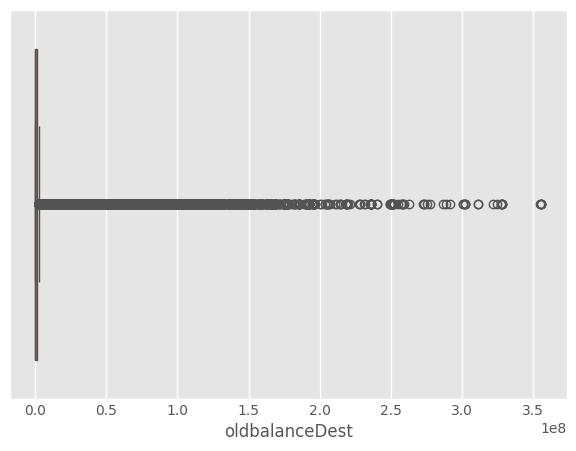

In [ ]:
#oldbalanceDest
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

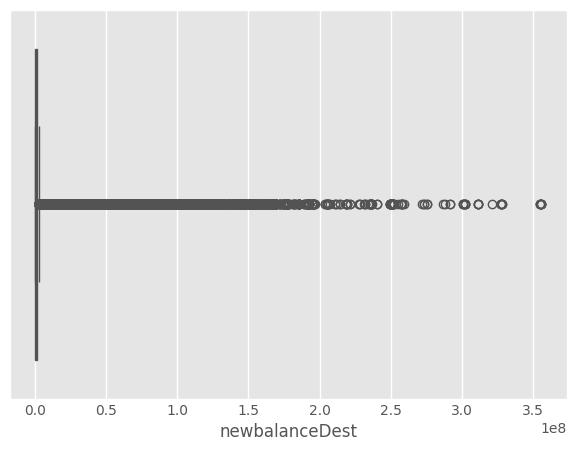

In [ ]:
#newbalanceDest
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

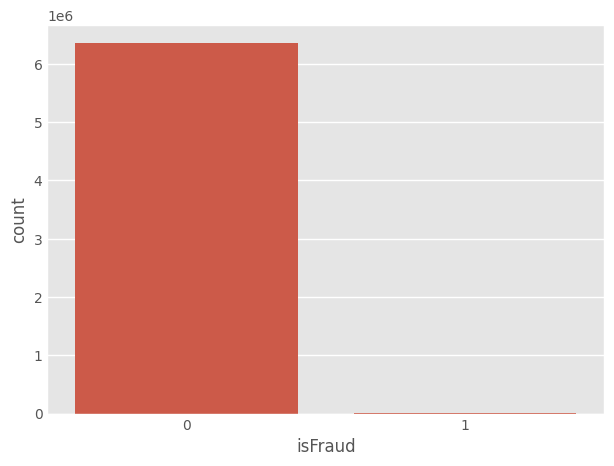

In [ ]:
#isFraud:
sns.countplot(data=df,x='isFraud')

In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
df.loc[df['isFraud']==0,'isFraud']='is not Fraud'
df.loc[df['isFraud']==1,'isFraud']='is Fraud'

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,is Fraud
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,is Fraud
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,is Fraud
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,is Fraud


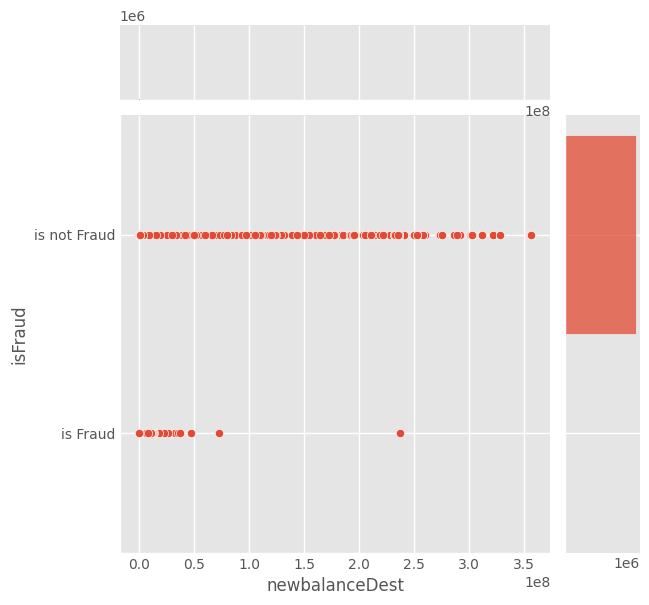

In [ ]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

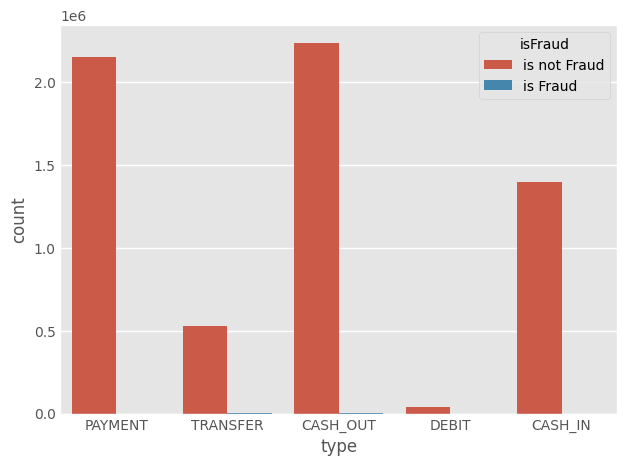

In [ ]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

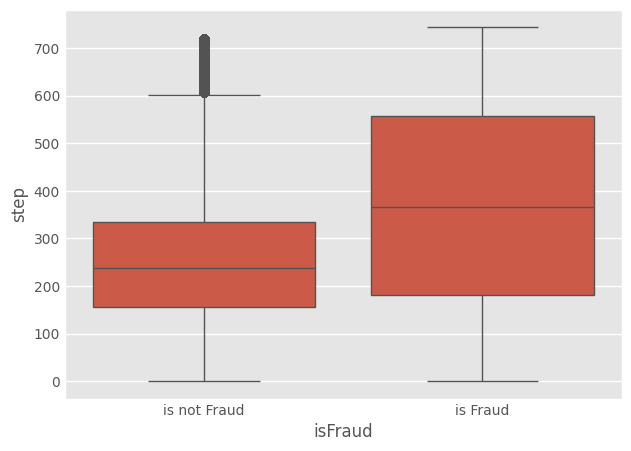

In [ ]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

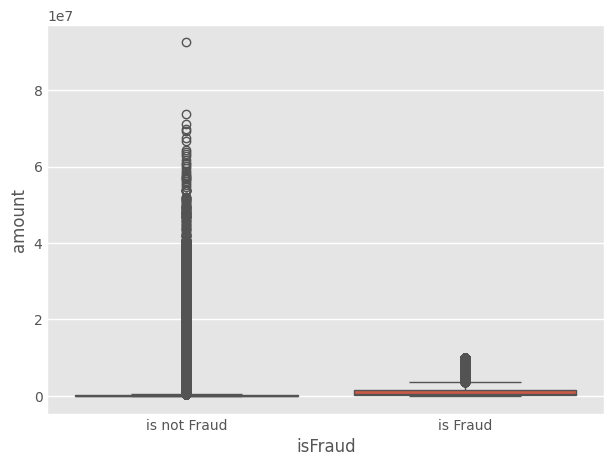

In [ ]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

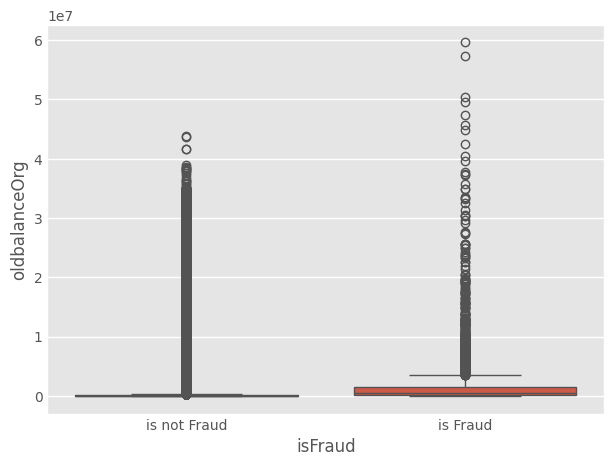

In [ ]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

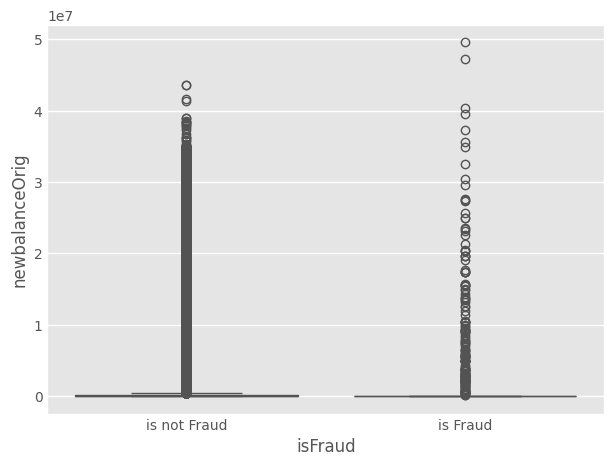

In [ ]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

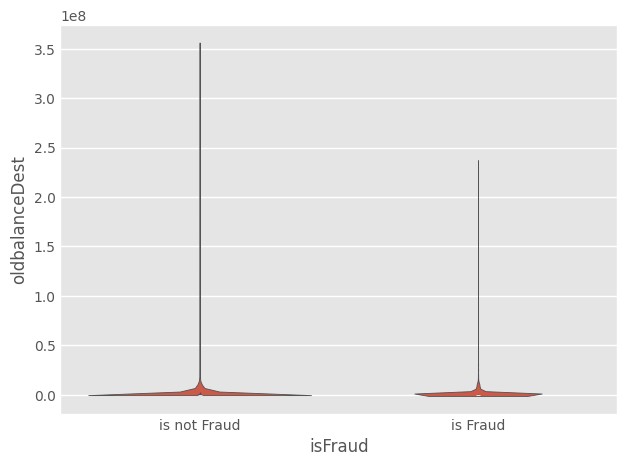

In [ ]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

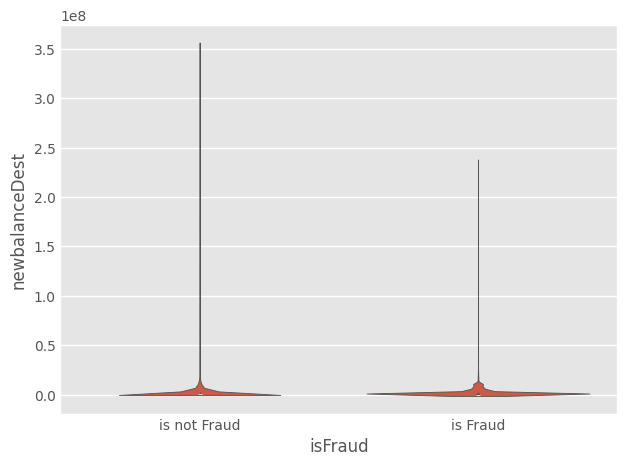

In [ ]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

In [ ]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C1530544995,NaN,NaN,C1286084959,NaN,NaN,is not Fraud
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,6354407
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,NaN
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,NaN
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,NaN
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,NaN


In [ ]:
# shape of csv data
df.shape

(6362620, 10)

In [ ]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,is not Fraud


In [ ]:
# Finding null values
df.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         object 
dtypes: float64(5), int64(1), object(2)
memory usage: 388.3+ MB


<Axes: ylabel='amount'>

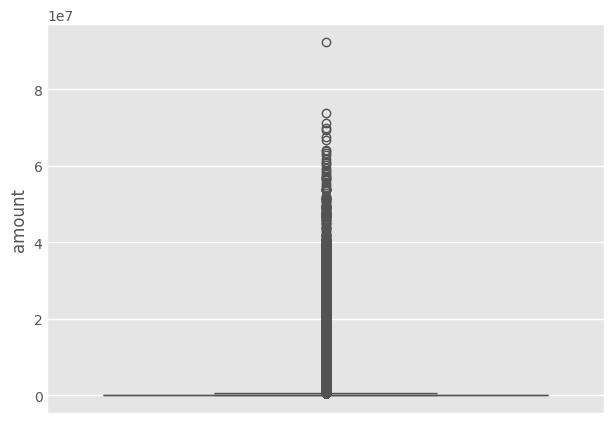

In [ ]:
sns.boxplot(df['amount'])

In [ ]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))


ModeResult(mode=np.float64(10000000.0), count=np.int64(3207))
179861.90354913071


In [ ]:
q1 = np.quantile(df['amount'], 0.25)
q3 = np.quantile(df['amount'], 0.75)

IQR = q3 - q1

upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

print('q1 :', q1)
print('q3 :', q3)
print('IQR :', IQR)
print('Upper Bound :', upper_bound)
print('Lower Bound :', lower_bound)
print('Skewed data :', len(df[df['amount'] > upper_bound]))
print('Skewed data :', len(df[df['amount'] < lower_bound]))


q1 : 13389.57
q3 : 208721.4775
IQR : 195331.9075
Upper Bound : 501719.33875
Lower Bound : -279608.29125
Skewed data : 338078
Skewed data : 0


In [ ]:
# To handle outliers transformation techniques are used.

def transformationPlot(feature):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.distplot(feature)

    plt.subplot(1, 2, 2)
    stats.probplot(feature, plot=plt)


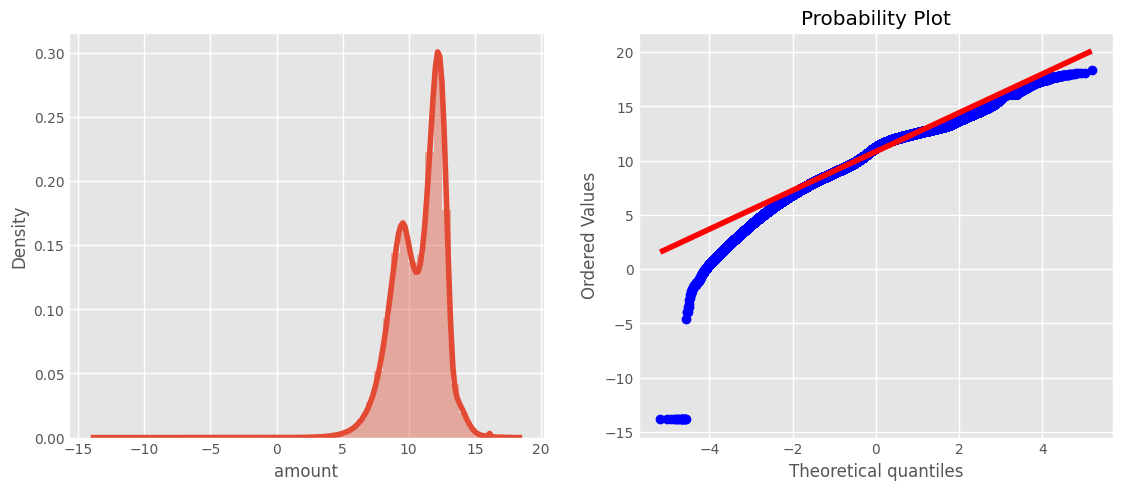

In [ ]:
transformationPlot(np.log(df['amount'] + 1e-6))

In [ ]:
df['amount']=np.log(df['amount'] + 1e-6)

In [ ]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])


In [ ]:
df['type'].value_counts()

,count
type,
1,2237500
3,2151495
0,1399284
4,532909
2,41432


In [ ]:
x = df.drop('isFraud', axis=1)
y = df['isFraud']

In [ ]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9.194174,170136.00,160296.36,0.00,0.00
1,1,3,7.530630,21249.00,19384.72,0.00,0.00
2,1,4,5.198497,181.00,0.00,0.00,0.00
3,1,1,5.198497,181.00,0.00,21182.00,0.00
4,1,3,9.364617,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,1,12.735766,339682.13,0.00,0.00,339682.13
6362616,743,4,15.657870,6311409.28,0.00,0.00,0.00
6362617,743,1,15.657870,6311409.28,0.00,68488.84,6379898.11
6362618,743,4,13.652995,850002.52,0.00,0.00,0.00


In [ ]:
y

,isFraud
0,is not Fraud
1,is not Fraud
2,is Fraud
3,is Fraud
4,is not Fraud
...,...
6362615,is Fraud
6362616,is Fraud
6362617,is Fraud
6362618,is Fraud


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(5090096, 7)
(1272524, 7)
(1272524,)
(5090096,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.9997108109552354

In [ ]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_test,y_test_predict1)
train_accuracy

0.9997108109552354

In [ ]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1299,342
is not Fraud,26,1270857


In [ ]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       0.98      0.79      0.88      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy


0.9997076675960532

In [ ]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1434,207
is not Fraud,165,1270718


In [ ]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.90      0.87      0.89      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy

0.999704524236871

In [ ]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1279,362
is not Fraud,14,1270869


In [ ]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       0.99      0.78      0.87      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
y_trainl = la.fit_transform(y_train)

In [ ]:
y_testl = la.transform(y_test)

In [ ]:
y_testl = la.transform(y_test)

In [ ]:
y_testl

In [ ]:
y_trainl

In [ ]:
from xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train, y_train1)

y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy

In [ ]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy

In [ ]:
pd.crosstab(y_test1,y_test_predict5)

In [ ]:
From sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_predict5))

SyntaxError: invalid syntax (ipython-input-2282342143.py, line 1)

In [ ]:
from sklearn.metrics import accuracy_score

def compareModel():
    print("Train accuracy for rfc:", accuracy_score(y_train, y_train_predict1))
    print("Test accuracy for rfc:", accuracy_score(y_test, y_test_predict1))

    print("Train accuracy for dtc:", accuracy_score(y_train, y_train_predict2))
    print("Test accuracy for dtc:", accuracy_score(y_test, y_test_predict2))

    print("Train accuracy for etc:", accuracy_score(y_train, y_train_predict3))
    print("Test accuracy for etc:", accuracy_score(y_test, y_test_predict3))

    print("Train accuracy for svc:", accuracy_score(y_train, y_train_predict4))
    print("Test accuracy for svc:", accuracy_score(y_test, y_test_predict4))

    print("Train accuracy for xgb:", accuracy_score(y_train, y_train_predict5))
    print("Test accuracy for xgb:", accuracy_score(y_test, y_test_predict5))


In [ ]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

In [ ]:
import pickle
pickle.dump(svc,open('payment.pkl','wb'))